  - 상관분석, 상관계수, 피어슨 상관 계수, 히트맵
  - 데이터 : seaborn 내장 데이터
  - 모든 변수간의 상관관계 구하기
  - 지정한 두 변수간의 상관계수 구하기

상관분석
  - 두 변수가 어떤 선형적 관계에 있는지를 분석하는 방법
  - 두 변수는 서로 독립적인거나 상관된 관계일수 있음 그 강도
  - 상관계수 p를 사용
  - 상관계수는 두 변수가 연관된 정도를 나타낼뿐. 인과관계는 설명하지 않는다

상관계수 p
  - 0~1사이의 값, + - 방향
  - (+) 양의상관관계
  - (-) 이면 음의 상관관계

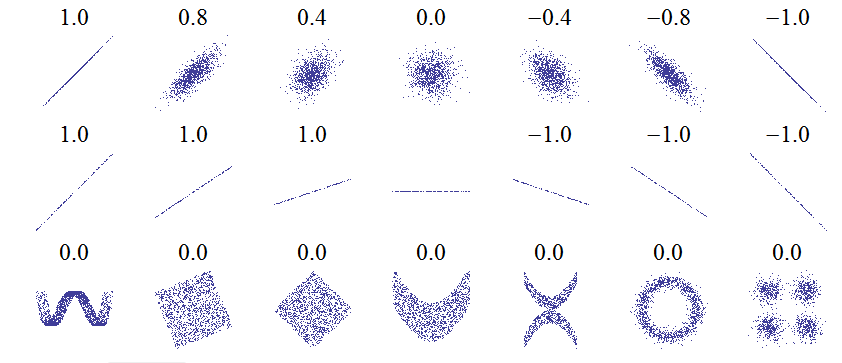
  

단순 상관 분석
  - 두 변수가 어느정도 강한 관계

다중 상관 분석
  - 세 개 이상의 변수간의 관계
  - 편상관 분석 : 다른 변수와의 관계를 고정하고 두 변수 가 관계의 강도를 나타내는 것  

##### 데이터 수집

In [1]:
import seaborn as sns
import pandas as pd
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


##### 데이터 확인
  - 데이터 정리
  - 결측치 여부 확인  
  - 이상치 확인  

In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
titanic.isna().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

결측치 처리
  - 있는지 확인
  - drop, fill(평균, 0, 중위수)

In [8]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [10]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [11]:
titanic['embarked'] = titanic['embarked'].fillna('S')

In [15]:
titanic['deck'] = titanic['deck'].fillna('C')

In [16]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

In [17]:
# 결측치 처리를 해서 결측치가 없는지 확인
titanic.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [18]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

시각화

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
# 남자 승객의 생존율
# 여자 승객의 생존율

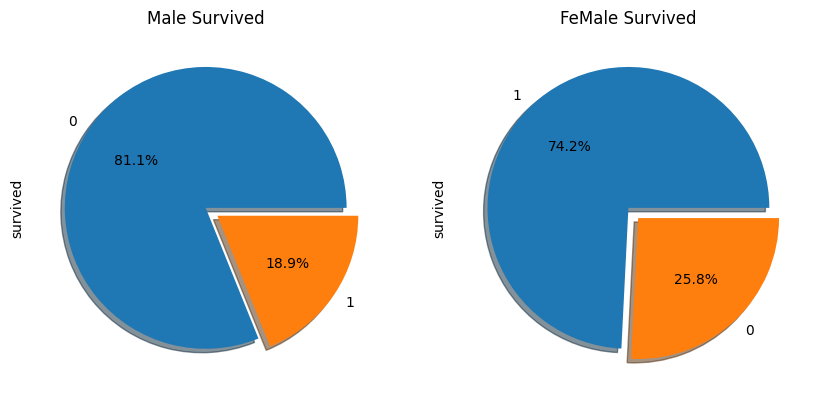

In [34]:
f,ax =  plt.subplots(1,2,figsize=(10,5))
titanic[ titanic['sex'] == 'male' ]['survived'].value_counts().plot.pie(
    explode = [0,0.1], autopct = '%1.1f%%',shadow=True, ax= ax[0]
    )
ax[0].set_title("Male Survived")
titanic[ titanic['sex'] == 'female' ]['survived'].value_counts().plot.pie(
    explode = [0,0.1], autopct = '%1.1f%%',shadow=True, ax=ax[1]
    )
ax[1].set_title("FeMale Survived")
plt.show()

In [35]:
# 객실등급에 따른 생존자 수